In [317]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 20)

import cv2

from utils import *
    
resdir = 'res'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [318]:
TASK = 3
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

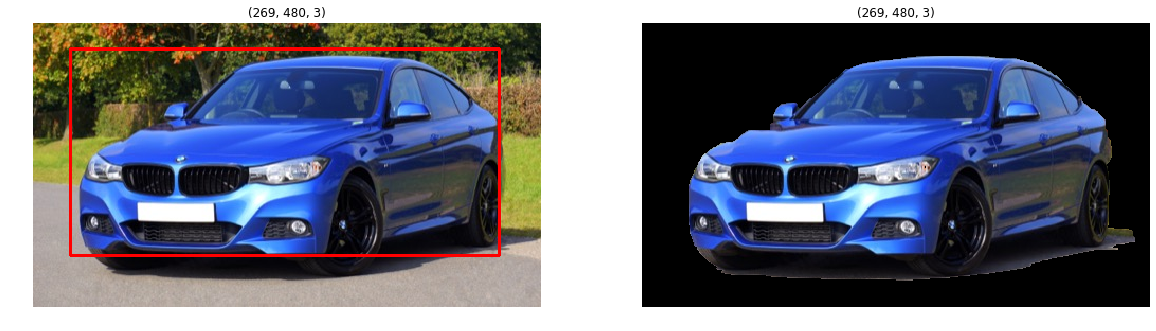

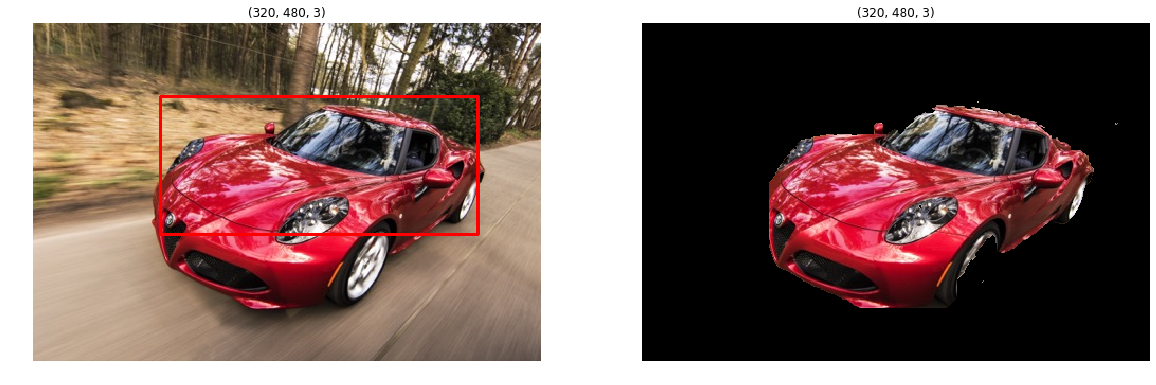

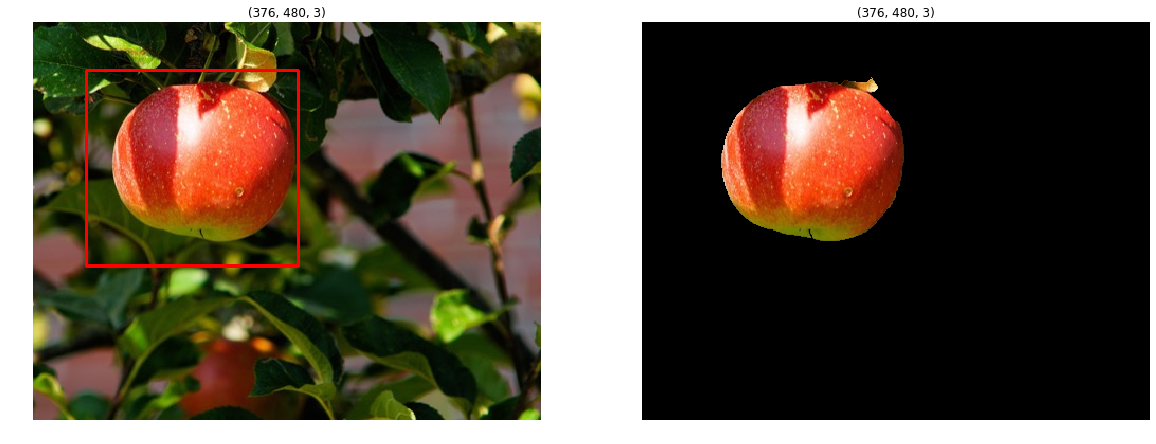

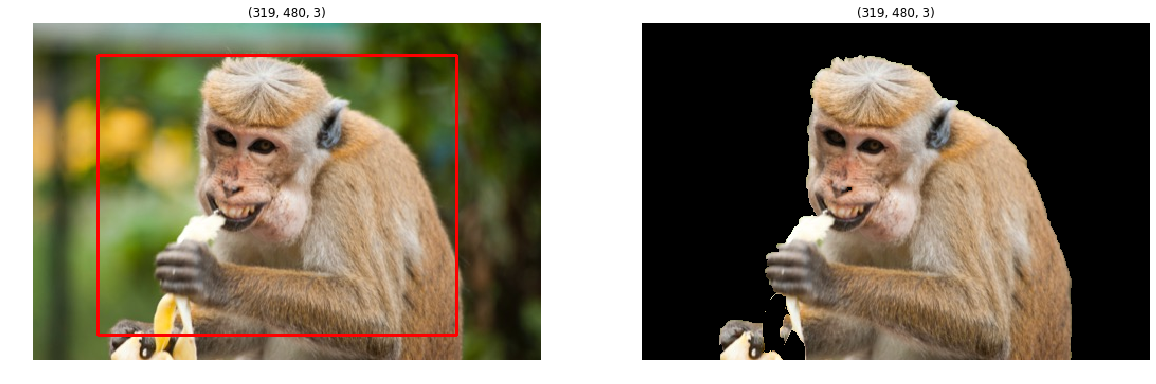

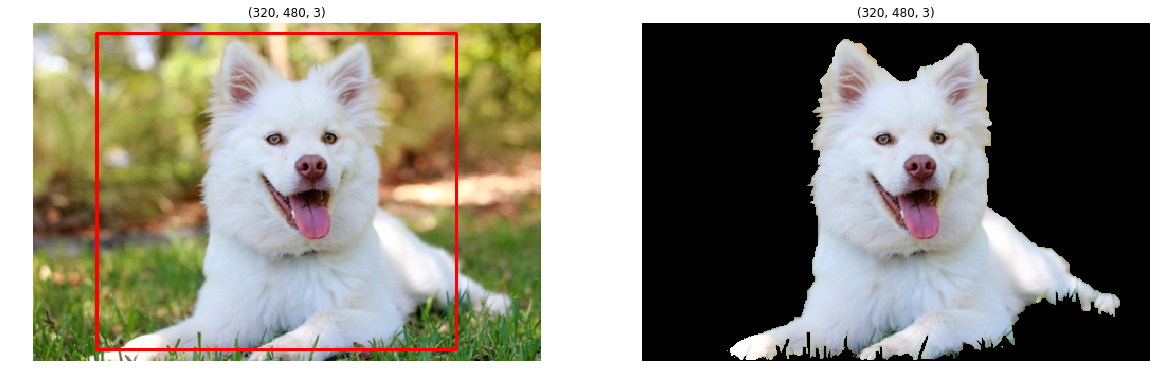

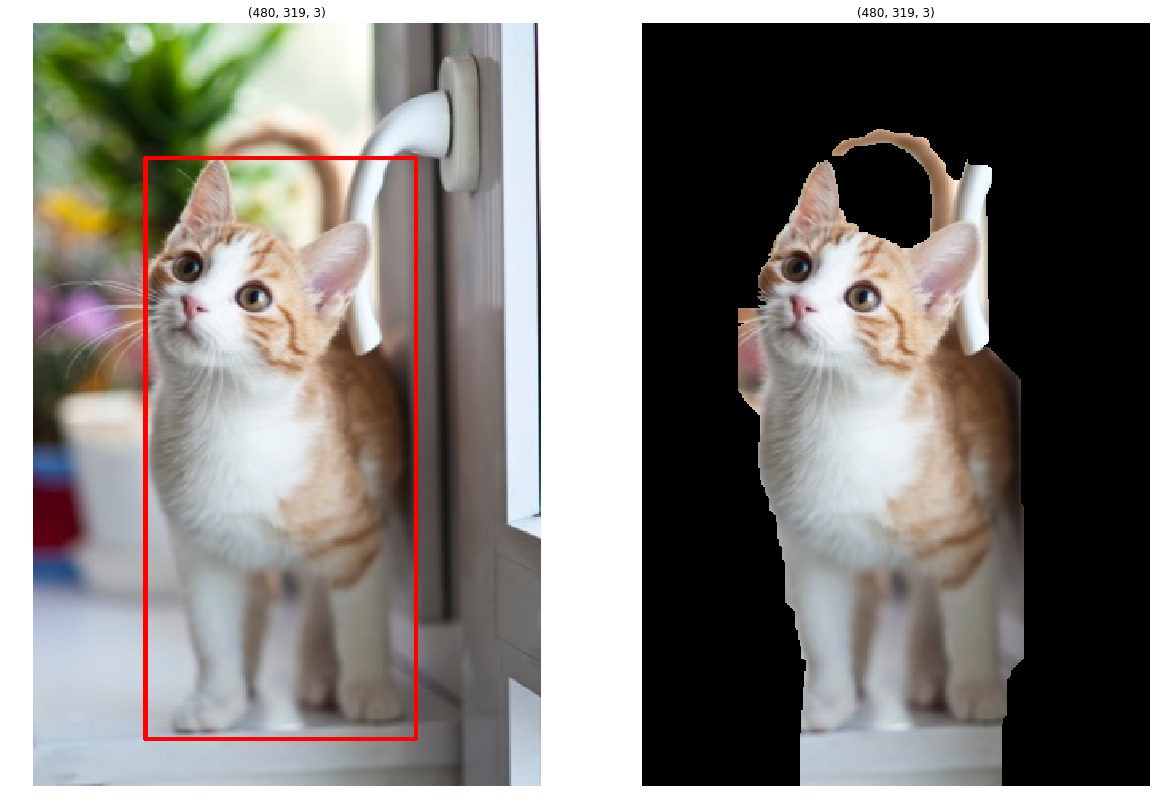

In [348]:
rects = [
    (35,25,440,220),
    (120,70,420,200),
    (50,45,250,230),
    (61,31,400,295),
    (60,10,400,309),
    (70,85,240,450)
]

for i, example_id in enumerate(range(1,7)):
    image, _ = get_example(example_id, TASK, show=False)

    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    rect = rects[i]
    image_bbox = image.copy()
    cv2.rectangle(image_bbox, rect[:2], rect[2:], (255,0,0), thickness=2)
    imshow(image_bbox, sub=(1,2,1))

    if i == 5:
        mask = np.ones(image.shape[:2], np.uint8) * 2
        cat_blurred = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,2], (5,5), 3)
        cat_blurred = (((cat_blurred - cat_blurred.min()) / (cat_blurred.max() - cat_blurred.min())) * 255).astype(np.uint8)
        mask[150:300, 100:200] = 1
        mask[350:400, 100:240] = 1
        mask[cat_blurred > 160] = 1
        mask[~rect[1]:rect[3], ~rect[0]:rect[1]] = 0
        mask[:, 250:] = 0
        mask[:, :60] = 0

        cv2.grabCut(image, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
    else:
        mask = np.zeros(image.shape[:2], np.uint8)
        cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    image = image * mask2[:,:,np.newaxis]

    imshow(image, sub=(1,2,2))
    plt.show()
    save(image, TASK, example_id)